# Milestone 2 - Training Transformer Models with GloVe embeddings

### Imports

In [1]:
%cd ..
# imports
from scripts_m2 import *


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\001\OneDrive\Desktop\GUC\semester 10\nlp\NLP_PROJECT_111\QA Task milestone


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TOR

### 1. Get Dataloaders

In [2]:
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer_glove()

Filtered dataset size: 19900 out of original 20000
Filtered dataset size: 1986 out of original 2000


### 2. Model Training

#### Question [PAD] [SEP] Context [PAD]

In [3]:
print(tokenizer.get_pretrained_embeddings().shape)

torch.Size([400006, 300])


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TransformerQAModel3(
    vocab_size=10_000,
    d_model=300,
    num_layers=4,
    num_heads=6,
    dim_feedforward=512,
    max_question_len=20,
    max_context_len=249,
    dropout=0.01,
    pretrained_embeddings=tokenizer.get_pretrained_embeddings(),
    freeze_embeddings=True,
)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model,
    train_dataloader=train_dataloader,
    val_dataloader=dev_dataloader,
    optimizer=optimizer,
    criterion=criterion,
    num_epochs=20,
    device=device,
    inputs = ["context_question", "attention_mask_context_question"],
    evaluate_val_dataset=True,
)


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/20:   0%|          | 0/622 [00:00<?, ?it/s]c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = sca

Epoch 1 Loss: 9.6255


Evaluating: 100%|██████████| 622/622 [00:40<00:00, 15.23it/s]


Training Loss: 11.0353
Training Metrics: {'start_accuracy': 0.020402010050251256, 'start_precision': 0.02497158966968341, 'start_recall': 0.020402010050251256, 'start_f1_score': 0.021571562743829126, 'end_accuracy': 0.009246231155778894, 'end_precision': 0.025214968530482634, 'end_recall': 0.009246231155778894, 'end_f1_score': 0.011799549034939849, 'joint_exact_match': 0.0, 'span_overlap_f1': 0.010191438635492895}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 15.10it/s]


Validation Loss: 11.0354
Validation Metrics: {'start_accuracy': 0.023162134944612285, 'start_precision': 0.025542186683226692, 'start_recall': 0.023162134944612285, 'start_f1_score': 0.023162537812459368, 'end_accuracy': 0.012084592145015106, 'end_precision': 0.032457319648540546, 'end_recall': 0.012084592145015106, 'end_f1_score': 0.016278726057150483, 'joint_exact_match': 0.0, 'span_overlap_f1': 0.01086367010166862}
Validation loss improved to 11.0354. Saving model state.
--------------------------------------------------


Epoch 2/20: 100%|██████████| 622/622 [00:49<00:00, 12.62it/s, loss=11]  


Epoch 2 Loss: 11.0331


Evaluating: 100%|██████████| 622/622 [00:40<00:00, 15.33it/s]


Training Loss: 10.9352
Training Metrics: {'start_accuracy': 0.024120603015075376, 'start_precision': 0.027519719597318998, 'start_recall': 0.024120603015075376, 'start_f1_score': 0.024901857344360293, 'end_accuracy': 0.027386934673366833, 'end_precision': 0.031525292997221746, 'end_recall': 0.027386934673366833, 'end_f1_score': 0.0283707826982029, 'joint_exact_match': 0.022964824120603015, 'span_overlap_f1': 0.025890752358228786}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.84it/s]


Validation Loss: 10.9039
Validation Metrics: {'start_accuracy': 0.027190332326283987, 'start_precision': 0.02858096167526328, 'start_recall': 0.027190332326283987, 'start_f1_score': 0.025837346358535247, 'end_accuracy': 0.02920443101711984, 'end_precision': 0.03546264602178985, 'end_recall': 0.02920443101711984, 'end_f1_score': 0.02825156336124711, 'joint_exact_match': 0.024672708962739175, 'span_overlap_f1': 0.028156397962431502}
Validation loss improved to 10.9039. Saving model state.
--------------------------------------------------


Epoch 3/20: 100%|██████████| 622/622 [00:50<00:00, 12.33it/s, loss=11]  


Epoch 3 Loss: 10.9807


Evaluating: 100%|██████████| 622/622 [00:42<00:00, 14.57it/s]


Training Loss: 11.0349
Training Metrics: {'start_accuracy': 0.017989949748743718, 'start_precision': 0.02173819982464732, 'start_recall': 0.017989949748743718, 'start_f1_score': 0.018862131580745296, 'end_accuracy': 0.022010050251256283, 'end_precision': 0.025332251117352073, 'end_recall': 0.022010050251256283, 'end_f1_score': 0.02280245965902148, 'joint_exact_match': 0.012412060301507538, 'span_overlap_f1': 0.01701094901287002}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 13.98it/s]


Validation Loss: 11.0349
Validation Metrics: {'start_accuracy': 0.019637462235649546, 'start_precision': 0.02608119081491336, 'start_recall': 0.019637462235649546, 'start_f1_score': 0.0210332721198406, 'end_accuracy': 0.019133937562940583, 'end_precision': 0.019837528041055562, 'end_recall': 0.019133937562940583, 'end_f1_score': 0.018178087150657725, 'joint_exact_match': 0.010574018126888218, 'span_overlap_f1': 0.016801793944827555}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 4/20: 100%|██████████| 622/622 [00:50<00:00, 12.35it/s, loss=11.1]


Epoch 4 Loss: 11.0382


Evaluating: 100%|██████████| 622/622 [00:43<00:00, 14.29it/s]


Training Loss: 11.0349
Training Metrics: {'start_accuracy': 0.008391959798994975, 'start_precision': 0.007852932537129657, 'start_recall': 0.008391959798994975, 'start_f1_score': 0.007101886068770826, 'end_accuracy': 0.008994974874371859, 'end_precision': 0.007921843048657513, 'end_recall': 0.008994974874371859, 'end_f1_score': 0.0077607023575529165, 'joint_exact_match': 0.00030150753768844223, 'span_overlap_f1': 0.011203696372706655}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.35it/s]


Validation Loss: 11.0349
Validation Metrics: {'start_accuracy': 0.008056394763343404, 'start_precision': 0.011100550463560895, 'start_recall': 0.008056394763343404, 'start_f1_score': 0.007334630589121384, 'end_accuracy': 0.0075528700906344415, 'end_precision': 0.00856841415081882, 'end_recall': 0.0075528700906344415, 'end_f1_score': 0.0071449495549766595, 'joint_exact_match': 0.0, 'span_overlap_f1': 0.008908633157984045}
Validation loss did not improve. No improvement for 2 epochs.
--------------------------------------------------


Epoch 5/20: 100%|██████████| 622/622 [00:49<00:00, 12.51it/s, loss=11]  


Epoch 5 Loss: 11.0377


Evaluating: 100%|██████████| 622/622 [00:43<00:00, 14.43it/s]


Training Loss: 11.0348
Training Metrics: {'start_accuracy': 0.012814070351758794, 'start_precision': 0.013865637849598374, 'start_recall': 0.012814070351758794, 'start_f1_score': 0.012663908582692557, 'end_accuracy': 0.013015075376884422, 'end_precision': 0.014004649939882055, 'end_recall': 0.013015075376884422, 'end_f1_score': 0.012959140979044145, 'joint_exact_match': 0.008090452261306533, 'span_overlap_f1': 0.012149144745717398}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.39it/s]


Validation Loss: 11.0349
Validation Metrics: {'start_accuracy': 0.008559919436052367, 'start_precision': 0.007861517846856392, 'start_recall': 0.008559919436052367, 'start_f1_score': 0.007824312753620208, 'end_accuracy': 0.008056394763343404, 'end_precision': 0.01391486379693638, 'end_recall': 0.008056394763343404, 'end_f1_score': 0.008536233809730445, 'joint_exact_match': 0.004531722054380665, 'span_overlap_f1': 0.00868285049690455}
Validation loss did not improve. No improvement for 3 epochs.
--------------------------------------------------


Epoch 6/20: 100%|██████████| 622/622 [00:49<00:00, 12.53it/s, loss=11]  


Epoch 6 Loss: 11.0364


Evaluating: 100%|██████████| 622/622 [00:41<00:00, 14.83it/s]


Training Loss: 11.0348
Training Metrics: {'start_accuracy': 0.01306532663316583, 'start_precision': 0.01492872674828349, 'start_recall': 0.01306532663316583, 'start_f1_score': 0.013328898479310805, 'end_accuracy': 0.01306532663316583, 'end_precision': 0.014343439262597747, 'end_recall': 0.01306532663316583, 'end_f1_score': 0.013285329184149796, 'joint_exact_match': 0.007738693467336684, 'span_overlap_f1': 0.012014879299156027}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.99it/s]


Validation Loss: 11.0348
Validation Metrics: {'start_accuracy': 0.00906344410876133, 'start_precision': 0.011161649690913362, 'start_recall': 0.00906344410876133, 'start_f1_score': 0.00911503540946035, 'end_accuracy': 0.012084592145015106, 'end_precision': 0.015513612147014195, 'end_recall': 0.012084592145015106, 'end_f1_score': 0.011939455799059313, 'joint_exact_match': 0.006545820745216516, 'span_overlap_f1': 0.0108511665653256}
Validation loss did not improve. No improvement for 4 epochs.
--------------------------------------------------


Epoch 7/20: 100%|██████████| 622/622 [00:49<00:00, 12.68it/s, loss=11]  


Epoch 7 Loss: 11.0374


Evaluating: 100%|██████████| 622/622 [00:42<00:00, 14.79it/s]


Training Loss: 11.0348
Training Metrics: {'start_accuracy': 0.011407035175879397, 'start_precision': 0.01268848736269078, 'start_recall': 0.011407035175879397, 'start_f1_score': 0.01166323803224729, 'end_accuracy': 0.010753768844221105, 'end_precision': 0.012256068026318474, 'end_recall': 0.010753768844221105, 'end_f1_score': 0.011116620430772479, 'joint_exact_match': 0.008844221105527638, 'span_overlap_f1': 0.01144135846176147}


Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.74it/s]

Validation Loss: 11.0348
Validation Metrics: {'start_accuracy': 0.00906344410876133, 'start_precision': 0.007855292870663624, 'start_recall': 0.00906344410876133, 'start_f1_score': 0.007869614439245748, 'end_accuracy': 0.00906344410876133, 'end_precision': 0.008699851593328438, 'end_recall': 0.00906344410876133, 'end_f1_score': 0.008417796109676934, 'joint_exact_match': 0.0075528700906344415, 'span_overlap_f1': 0.009770890539701213}
Validation loss did not improve. No improvement for 5 epochs.
Early stopping triggered.
Loaded the best model state.


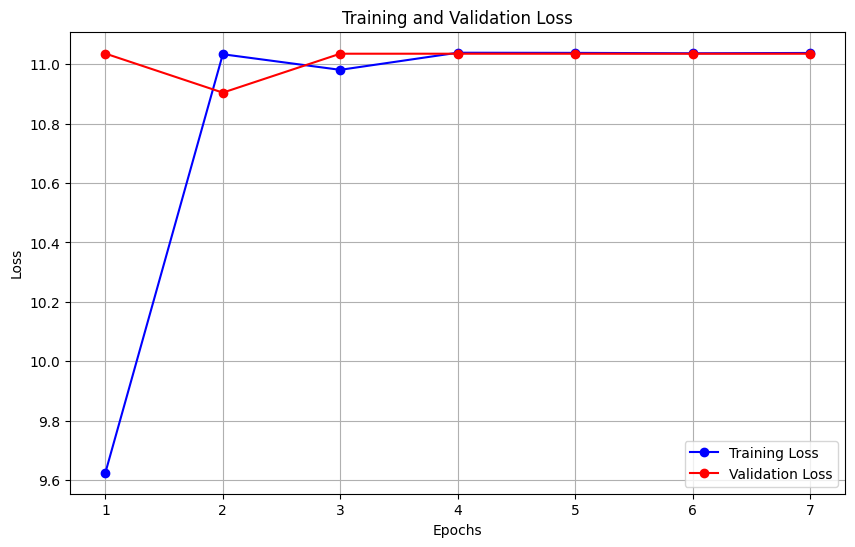

In [5]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

#### Save Model

In [6]:
model_path = "models/glove_qa_context_model_transformer.pkl"

In [7]:
save_model(model, model_path)

Model saved to models/glove_qa_context_model_transformer.pkl


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_model(model_path=model_path)

Model loaded from models/glove_qa_context_model_transformer.pkl


#### Evaluation

In [9]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device=device, inputs = ["context_question", "attention_mask_context_question"])

Evaluating: 100%|██████████| 622/622 [00:43<00:00, 14.21it/s]

Validation Loss: 10.9352
Validation Metrics: {'start_accuracy': 0.024120603015075376, 'start_precision': 0.027519719597318998, 'start_recall': 0.024120603015075376, 'start_f1_score': 0.024901857344360293, 'end_accuracy': 0.027386934673366833, 'end_precision': 0.031525292997221746, 'end_recall': 0.027386934673366833, 'end_f1_score': 0.0283707826982029, 'joint_exact_match': 0.022964824120603015, 'span_overlap_f1': 0.025890752358228786}


(10.935164756713572,
 {'start_accuracy': 0.024120603015075376,
  'start_precision': 0.027519719597318998,
  'start_recall': 0.024120603015075376,
  'start_f1_score': 0.024901857344360293,
  'end_accuracy': 0.027386934673366833,
  'end_precision': 0.031525292997221746,
  'end_recall': 0.027386934673366833,
  'end_f1_score': 0.0283707826982029,
  'joint_exact_match': 0.022964824120603015,
  'span_overlap_f1': 0.025890752358228786})

In [10]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device=device, inputs = ["context_question", "attention_mask_context_question"])

Evaluating: 100%|██████████| 63/63 [00:04<00:00, 14.62it/s]

Validation Loss: 10.9039
Validation Metrics: {'start_accuracy': 0.027190332326283987, 'start_precision': 0.02858096167526328, 'start_recall': 0.027190332326283987, 'start_f1_score': 0.025837346358535247, 'end_accuracy': 0.02920443101711984, 'end_precision': 0.03546264602178985, 'end_recall': 0.02920443101711984, 'end_f1_score': 0.02825156336124711, 'joint_exact_match': 0.024672708962739175, 'span_overlap_f1': 0.028156397962431502}


(10.903944969177246,
 {'start_accuracy': 0.027190332326283987,
  'start_precision': 0.02858096167526328,
  'start_recall': 0.027190332326283987,
  'start_f1_score': 0.025837346358535247,
  'end_accuracy': 0.02920443101711984,
  'end_precision': 0.03546264602178985,
  'end_recall': 0.02920443101711984,
  'end_f1_score': 0.02825156336124711,
  'joint_exact_match': 0.024672708962739175,
  'span_overlap_f1': 0.028156397962431502})

##### Evaluate predictions on test set

In [11]:
preds, true_labels, contexts, questions = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device=device, inputs = ["context_question", "attention_mask_context_question"])

Predicting: 100%|██████████| 63/63 [00:04<00:00, 14.11it/s]


In [12]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {questions[i]}")
    print(f"Context: {contexts[i]}")
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Question: how many khitan tumens were there ?
Context: many han chinese and khitan defected to mongols to fight against jin . two han chinese leaders , shi , liu ( , liu ni ) , and khitan xiao ( ) defected and commanded 3 tumens in mongol army . liu and shi served khan . liu and shi tianxiang led armies against western xia for mongols . there were 4 han tumens and 3 khitan tumens , with each tumen consisting of 10 , 000 troops . three khitan generals ( ) , ( ) and ( ) commanded three khitan tumens and four han generals zhang rou , yan shi , shi , and liu commanded four han tumens under khan .
Predicted Answer: rou
True Answer: 3
--------------------------------------------------
Question: what is atomic number of element oxygen ?
Context: oxygen is a chemical element with symbol o and atomic number 8 . it is a member of group on periodic table and is a highly reactive nonmetal and oxidizing agent that readily forms compounds ( notably oxides ) with most elements . by mass , oxygen is t

##### Evaluate predictions on training set

In [13]:
train_preds, train_true_labels, train_contexts, train_questions = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device=device, inputs = ["context_question", "attention_mask_context_question"])

Predicting: 100%|██████████| 622/622 [00:46<00:00, 13.33it/s]


In [14]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {train_questions[i]}")
    print(f"Context: {train_contexts[i]}")
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Question: how many public golf courses does guam currently have ?
Context: lying in western pacific , guam is a popular destination for japanese tourists . its tourist hub , tumon , features over 20 large hotels , a duty free shoppers galleria , pleasure island district , indoor aquarium , sandcastle las shows and other shopping and entertainment venues . it is a relatively short flight from asia or australia compared to hawaii , with hotels and seven public golf courses accommodating over a million tourists per year . although of tourists are japanese , guam receives a sizable number of tourists from south korea , u . s . , philippines , and taiwan . significant sources of revenue include duty-free designer shopping outlets , and american-style malls micronesia mall , guam premier outlets , agana shopping center , and world ' s largest kmart .
Predicted Answer: agana
True Answer: seven
--------------------------------------------------
Question: what president ignored eisenhower ' s r